# Libraries

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import wordnet as wn 

In [2]:
import os

## Gather

### I. Get all URLs, store them in a list

#### Number and format

In [3]:
NUM_PAGES_FRANCE = 25
base_url_France = "https://www.allrecipes.com/recipes/721/" + \
                 "world-cuisine/european/french/?page="


#### Libraries

In [4]:
import requests
import bs4

#### Function to get the urls from a page

In [5]:
def recipe_urls_in_a_page(url):
    """Given an webpage url returns a list of 
    recipe urls in the webpage
    (CAUTION: Applies to allrecipes.com only)"""
    
    res = requests.get(url)
    res.raise_for_status()
    
    soup = bs4.BeautifulSoup(res.text, "lxml")
    elems = soup.find_all('article', class_ = "fixed-recipe-card")
    recipe_urls = [elem.find_all('a')[0].get('href') for elem in elems]
    
    return recipe_urls

#### Test!

In [6]:
recipe_urls_in_a_page(base_url_France+"1")

['https://www.allrecipes.com/recipe/16602/cordon-bleu-chicken-rolls/',
 'https://www.allrecipes.com/recipe/223506/poulet-de-provencal/',
 'https://www.allrecipes.com/recipe/246439/gratin-dauphinois-de-solange/',
 'https://www.allrecipes.com/recipe/190997/traditional-layered-french-croissants/',
 'https://www.allrecipes.com/recipe/83905/calis-sinful-creme-brulee/',
 'https://www.allrecipes.com/recipe/16905/beef-bourguignon-ii/',
 'https://www.allrecipes.com/recipe/222387/chef-johns-creme-fraiche/',
 'https://www.allrecipes.com/recipe/16386/french-onion-soup-v/',
 'https://www.allrecipes.com/recipe/239230/chef-johns-coq-au-vin/',
 'https://www.allrecipes.com/recipe/8669/chicken-cordon-bleu-ii/',
 'https://www.allrecipes.com/recipe/15925/creamy-au-gratin-potatoes/',
 'https://www.allrecipes.com/recipe/16383/basic-crepes/',
 'https://www.allrecipes.com/recipe/8495/chicken-cordon-bleu-i/',
 'https://www.allrecipes.com/recipe/7028/french-baguettes/',
 'https://www.allrecipes.com/recipe/91192

#### Get the Urls!

In [7]:
from time import sleep

In [10]:
recipe_urls_French = []

for page_num in range(1, NUM_PAGES_FRANCE + 1):

    print('Souping page number', page_num, ', ', 
          len(recipe_urls_French), ' found so far')
    url = base_url_France + str(page_num)
    recipe_urls_French.extend(recipe_urls_in_a_page(url))
    sleep(10)
    

Souping page number 1 ,  0  found so far
Souping page number 2 ,  27  found so far
Souping page number 3 ,  47  found so far
Souping page number 4 ,  67  found so far
Souping page number 5 ,  87  found so far
Souping page number 6 ,  107  found so far
Souping page number 7 ,  127  found so far
Souping page number 8 ,  147  found so far
Souping page number 9 ,  167  found so far
Souping page number 10 ,  187  found so far
Souping page number 11 ,  207  found so far
Souping page number 12 ,  227  found so far
Souping page number 13 ,  247  found so far
Souping page number 14 ,  267  found so far
Souping page number 15 ,  287  found so far
Souping page number 16 ,  307  found so far
Souping page number 17 ,  327  found so far
Souping page number 18 ,  347  found so far
Souping page number 19 ,  367  found so far
Souping page number 20 ,  387  found so far
Souping page number 21 ,  407  found so far
Souping page number 22 ,  427  found so far
Souping page number 23 ,  447  found so far
Sou

#### Write URLs

In [11]:
f = open('French_recipes_urls.txt', 'w')
for url in recipe_urls_French:
    f.write(url+'\n')
f.close()

#### Read URLs

In [12]:
f = open('French_recipes_urls.txt')
for i, line in enumerate(f):
    print(line.rstrip())
    if i>9: break
f.close()

https://www.allrecipes.com/recipe/16602/cordon-bleu-chicken-rolls/
https://www.allrecipes.com/recipe/223506/poulet-de-provencal/
https://www.allrecipes.com/recipe/246439/gratin-dauphinois-de-solange/
https://www.allrecipes.com/recipe/190997/traditional-layered-french-croissants/
https://www.allrecipes.com/recipe/83905/calis-sinful-creme-brulee/
https://www.allrecipes.com/recipe/16905/beef-bourguignon-ii/
https://www.allrecipes.com/recipe/222387/chef-johns-creme-fraiche/
https://www.allrecipes.com/recipe/16386/french-onion-soup-v/
https://www.allrecipes.com/recipe/239230/chef-johns-coq-au-vin/
https://www.allrecipes.com/recipe/8669/chicken-cordon-bleu-ii/
https://www.allrecipes.com/recipe/15925/creamy-au-gratin-potatoes/


### II. For each URL, get
1. name
2. ingredients
3. url

Create a dictionary

III. Save the dictionaries in a list ###

#### Function for the details from a given URL

In [22]:
def recipe_details(url):
    """Given a url of a recipe returns a list of ingredients
    (CAUTION: Applies to allrecipes.com only)"""    

    res = requests.get(url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "lxml")

    name = ' '.join(url.split('/')[-2].split('-')).title()
    ingredients = []
    lines = soup.find_all('li', class_= "checkList__line")[:-4]
    for line in lines:
        item = line.find('label').get('title').split(" ")
        ingredients.extend(item)
        
    ingredients_string = " ".join(ingredients)
                          
    return {
        "name": name,
        "ingredients_string": ingredients_string,
        "url": url}

#### Load the list of URLs

In [14]:
recipes = []
f = open('French_recipes_urls.txt')
for line in f:
    recipes+= [line.rstrip()]
    
recipes[:3]

['https://www.allrecipes.com/recipe/16602/cordon-bleu-chicken-rolls/',
 'https://www.allrecipes.com/recipe/223506/poulet-de-provencal/',
 'https://www.allrecipes.com/recipe/246439/gratin-dauphinois-de-solange/']

In [18]:
len(recipes)

507

In [15]:
import timeit

In [16]:
import datetime

In [17]:
print("Time: {}".format(datetime.datetime.now()))

Time: 2018-08-06 14:00:46.466253


### Downloads details from all the urls

In [30]:
recipes_in_detail = []
f = open('French_recipes_details.txt', 'w')

for i, url in enumerate(recipes):
    
    # if i > 2: break
    
    if i%10 == 0:
        print('Time = {}, souping page {}'.format(datetime.datetime.now(), i))
    
    recipe = recipe_details(url)
    sleep(5)
    
    recipes_in_detail += [recipe]
    f.write(recipe["name"])
    f.write("\t" + recipe["ingredients_string"])
    f.write("\t" + recipe["url"] + "\n")
    
f.close()
# recipes_in_detail

Time = 2018-08-06 14:18:21.478563, souping page 0
Time = 2018-08-06 14:19:15.207421, souping page 10
Time = 2018-08-06 14:20:08.812994, souping page 20
Time = 2018-08-06 14:21:02.176635, souping page 30
Time = 2018-08-06 14:21:55.201867, souping page 40
Time = 2018-08-06 14:22:48.129121, souping page 50
Time = 2018-08-06 14:23:41.411881, souping page 60
Time = 2018-08-06 14:24:34.674189, souping page 70
Time = 2018-08-06 14:25:28.041443, souping page 80
Time = 2018-08-06 14:26:22.019374, souping page 90
Time = 2018-08-06 14:27:15.025444, souping page 100
Time = 2018-08-06 14:28:08.021334, souping page 110
Time = 2018-08-06 14:29:01.742550, souping page 120
Time = 2018-08-06 14:29:54.924470, souping page 130
Time = 2018-08-06 14:30:48.044598, souping page 140
Time = 2018-08-06 14:31:41.084725, souping page 150
Time = 2018-08-06 14:32:34.144112, souping page 160
Time = 2018-08-06 14:33:27.238235, souping page 170
Time = 2018-08-06 14:34:20.362167, souping page 180
Time = 2018-08-06 14:35

In [32]:
f = open('French_recipes_details.txt')
for i, line in enumerate(f):
    print(line.rstrip())
    if i > 3: break
    
f.close()

Cordon Bleu Chicken Rolls	8 skinless, boneless chicken breasts 8 slices cooked ham 4 slices Swiss cheese, cut into 1 inch pieces salt and pepper to taste 1 teaspoon dried thyme 1/4 cup melted butter 1/2 cup cornflakes cereal crumbs 1 (10.75 ounce) can condensed cream of chicken soup 1/2 cup sour cream	https://www.allrecipes.com/recipe/16602/cordon-bleu-chicken-rolls/
Poulet De Provencal	2 teaspoons olive oil 1 teaspoon butter 2 1/2 tablespoons balsamic vinegar 2 teaspoons Dijon mustard 3 large cloves garlic, chopped 4 (4 ounce) skinless, boneless chicken breast halves, pounded flat 1/3 cup chicken stock 1 large shallot, chopped 2 cups cremini mushrooms, chopped 1/3 cup chicken stock 1/4 teaspoon herbes de Provence, crumbled 1 1/2 teaspoons balsamic vinegar salt and ground black pepper to taste	https://www.allrecipes.com/recipe/223506/poulet-de-provencal/
Gratin Dauphinois De Solange	1 clove garlic, halved 2 pounds potatoes, peeled and thinly sliced 2 1/2 cups heavy whipping cream 2 1/4

In [29]:
line.rstrip().split("\t")

['Gratin Dauphinois De Solange',
 '1 clove garlic, halved 2 pounds potatoes, peeled and thinly sliced 2 1/2 cups heavy whipping cream 2 1/4 cups freshly grated Comte cheese',
 'https://www.allrecipes.com/recipe/246439/gratin-dauphinois-de-solange/']

In [33]:
df_recipes_in_detail = pd.DataFrame(recipes_in_detail)

In [34]:
df_recipes_in_detail.sample()

,ingredients_string,name,url
119,4 eggs 1 teaspoon ground cinnamon 1 teaspoon g...,Uncle Jesses French Toast,https://www.allrecipes.com/recipe/84454/uncle-...


In [35]:
df_recipes_in_detail.to_csv('French_recipes_details.csv', index=False)

In [36]:
df = pd.read_csv('French_recipes_details.csv')

In [37]:
df.sample()

,ingredients_string,name,url
55,1 recipe pastry for a 9 inch single crust pie ...,Quiche Lorraine Ii,https://www.allrecipes.com/recipe/18477/quiche...


In [82]:
# set of all ingredients
# including repetition
French_ingredients = []

for i, ingredients in enumerate(df['ingredients_string']):
    French_ingredients+=ingredients.lower().split(" ")
    # if i > 3: break
    
# Unique
French_ingredients = list(set(French_ingredients))
len(French_ingredients)


1258

In [83]:
# Code help from https://stackoverflow.com/questions/40167612/
# how-to-keep-only-the-noun-words-in-a-wordlist-python-nltk
text=' '.join(French_ingredients)
tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)

# ingredients should be nouns
nouns = [word for word, pos in tags 
         if (pos == 'NN' 
             or pos == 'NNP' 
             or pos == 'NNS' 
             or pos == 'NNPS')]

len(nouns)

702

In [84]:
nouns = list(set(nouns))
len(nouns)

559

In [85]:
nouns.sort()
nouns[:10]

['%',
 'allspice',
 'almond',
 'almonds',
 'anchovy',
 'anise',
 'apple',
 'apples',
 'apricots',
 'armagnac']

In [86]:
French_ingredients = nouns

In [87]:
f = open("French_ingredients.txt", 'w')
for item in French_ingredients:
    f.write(item + '\n')
    
f.close()

In [88]:
f = open("French_ingredients.txt")
for i, item in enumerate(f):
    print(item.rstrip())
    if i > 1: break
        
f.close()

%
allspice
almond


In [89]:
French_ingredients_inspected = []

In [90]:
f = open("French_ingredients_inspected.txt")
for item in f:
    French_ingredients_inspected.append(item.rstrip())
    
f.close()

In [91]:
len(French_ingredients_inspected)

401

In [97]:
replace_dictionary = {"chai": "tea",
                      "creme": "cream",
                      "filet": "fillet",
                      "filets": "fillets",
                     }

In [98]:
French_ingredients_inspected = [replace_dictionary.get(item, item) 
                                for item in French_ingredients_inspected]
len(French_ingredients_inspected)

401

In [103]:
ends_with_s = [item for item in French_ingredients_inspected if item.endswith('s')]
len(ends_with_s)

109

In [105]:
does_not_end_with_s = [item for item in French_ingredients_inspected 
                       if not item.endswith('s')]
len(does_not_end_with_s)

292

In [104]:
non_plurals = ['bass', 'beaujolais', 'boneless', 'jus', 'watercress']

plurals_special = {"berries": "berry",
                   "blackberries": "blackberry",
                   "blueberries": "blueberry",
                   "calves": "calf",
                   "cherries": "cherry",
                   "cranberries": "cranberry",
                   "leaves": "leaf",
                   "potatoes": "potato",
                   "radishes": "radish",
                   "strawberries": "strawberry",
                   "tomatoes": "tomato"
                   }

plurals_s = [word for word in ends_with_s if word not in non_plurals]
plurals_s = [word for word in plurals_s if word not in plurals_special]


In [129]:
plurals_s

['almonds',
 'apples',
 'apricots',
 'artichokes',
 'avocados',
 'baguettes',
 'bananas',
 'beans',
 'beets',
 'breadcrumbs',
 'breasts',
 'capers',
 'caps',
 'carrots',
 'cashews',
 'chestnuts',
 'chickpeas',
 'chips',
 'chives',
 'chops',
 'chunks',
 'clams',
 'cloves',
 'confectioners',
 'crackers',
 'crepes',
 'croissants',
 'croutons',
 'crumbs',
 'cucumbers',
 'drippings',
 'drumsticks',
 'eggs',
 'fillets',
 'fillets',
 'flakes',
 'florets',
 'flowers',
 'haricots',
 'hazelnuts',
 'herbes',
 'ladyfingers',
 'leeks',
 'lemons',
 'lentils',
 'livers',
 'macarons',
 'meatballs',
 'muffins',
 'mushrooms',
 'mussels',
 'noodles',
 'nuts',
 'olives',
 'omelets',
 'onions',
 'oranges',
 'oysters',
 'parsnips',
 'peaches',
 'peas',
 'pecans',
 'peppercorns',
 'peppers',
 'pits',
 'plums',
 'pluots',
 'pods',
 'prawns',
 'prunes',
 'quinces',
 'ramekins',
 'raspberries',
 'sausages',
 'scallions',
 'scallops',
 'seeds',
 'shallots',
 'shanks',
 'snails',
 'souffles',
 'stalks',
 'steaks'

In [109]:
French_ingredients_inspected = \
does_not_end_with_s \
+ non_plurals \
+ list(plurals_special.values()) \
+ [word[:-1] for word in plurals_s]

len(French_ingredients_inspected)

402

In [110]:
French_ingredients_inspected = list(set(French_ingredients_inspected))
len(French_ingredients_inspected)

364

In [112]:
French_ingredients_inspected.sort()
len(French_ingredients_inspected)

364

In [113]:
f = open('French_ingredients_final.txt', 'w')
for word in French_ingredients_inspected:
    f.write(word + '\n')
    
f.close()

In [123]:
French_ingredients_final = French_ingredients_inspected
len(French_ingredients_final)

364

In [119]:
ingredients = []

for i, item in enumerate(df['ingredients_string']):
    ingredients+=item.lower().split(" ")
    
len(ingredients)

20325

In [120]:
ingredients = [replace_dictionary.get(item, item) for item in ingredients]
len(ingredients)

20325

In [121]:
ingredients = [plurals_special.get(item, item) for item in ingredients]
len(ingredients)

20325

In [122]:
ingredients = [item[:-1] if item in plurals_s else item
               for item in ingredients]
len(ingredients)

20325

In [124]:
ingredients = [item for item in ingredients if item in French_ingredients_final]
len(ingredients)

4382

In [125]:
ingredients_series = pd.Series(ingredients)

In [126]:
counts = ingredients_series.value_counts()
counts[:5]

salt      308
sugar     207
pepper    203
egg       194
flour     189
dtype: int64

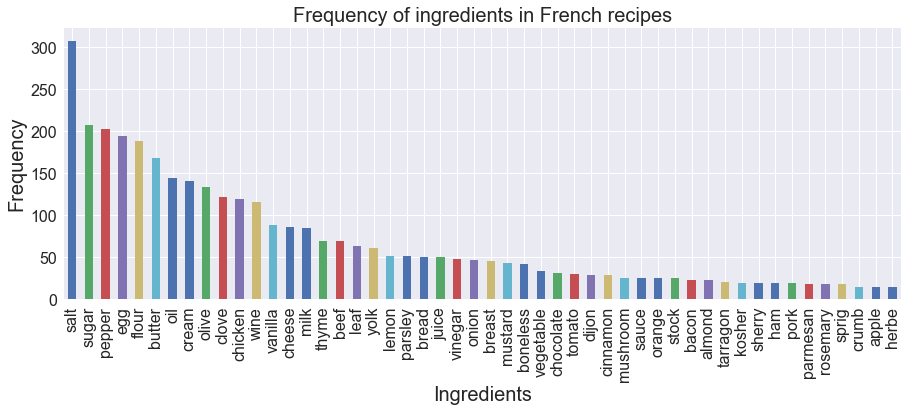

In [128]:
counts[:50].plot(kind='bar', figsize=(15, 5), rot = 90, fontsize=16)

plt.xlabel('Ingredients', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Frequency of ingredients in French recipes', size=20);